# Multivocal Literature Review - Systematic Literature Review Data Analysis
This notebook shows how to use litstudy from inside a Jupyter notebook. It shows how to load a dataset, plot statistics, perform topic modeling, do network analysis, and some more advanced features.

This notebook focuses on the topic of federated DT.

# Imports Selected Studies

In [1]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import re

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [2]:
from datetime import datetime

currentDateAndTime = datetime.now()
filename = (f'SOTA_SECO_CPS_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}')
filename_xlsx = (f'SOTA_SECO_CPS_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}.xlsx')

print(filename)

SOTA_SECO_CPS_2024-11-27_16-9-26


In [8]:
############################## LOAD Cleaned papers ###################################

# with open('AAA/studies.txt', 'r') as file:
#     data = file.read().splitlines()
#     print(data)
    
# Load csv file
docs_bib = litstudy.load_scopus_csv('Results/Selected.csv')
print(len(docs_bib), 'papers loaded from selected papers list')

12 papers loaded from selected papers list


In [9]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

docs_found_scopus, docs_notfound_scopus = litstudy.refine_scopus(docs_bib)

100%|██████████| 12/12 [00:00<00:00, 195.95it/s]


In [10]:
print(len(docs_found_scopus), 'papers found on Scopus')
print(len(docs_notfound_scopus), 'papers were not found')
docs_bib_scopus = docs_found_scopus | docs_notfound_scopus
len(docs_bib_scopus)

12 papers found on Scopus
0 papers were not found


12

In [11]:
docs_bib = docs_bib_scopus # docs_bib_scopus | docs_bib_SemanticScholar | docs_bib_CrossRef
docs_filtered = docs_bib # .filter_docs(lambda d: d.publication_year >= 1990)

In [12]:
index = 0
data = []
while index < len(docs_filtered):
    # re.sub('[<\[\]>]', '', str(docs_filtered[index].authors))

    authorList = []
    for author in docs_filtered[index].authors or []:
        authorList.append(author.name)

    if type(docs_filtered[index].id.doi) == type(None):
        print(docs_filtered[index].title)
        doi_paper = ''
        doi_paper_custom = ''
        # print(doi_paper)
    else:
        doi_paper = str(docs_filtered[index].id.doi) # 'https://www.doi.org/' + 
        doi_paper_custom = 'https://www.doi.org/' + str(docs_filtered[index].id.doi)
        print(doi_paper)

    data.append({'Authors': '', 'Author full names': re.sub(r'[\[\'\]]', '', str(authorList)), 'Author(s) ID': '', 
    'Title': docs_filtered[index].title, 'Year': docs_filtered[index].publication_year, 'Source title': docs_filtered[index].publication_source, 
    'Volume': '', 'Issue': '', 'Art. No.': '', 'Page start': '', 'Page end': '', 'Page count': '', 'Cited by': docs_filtered[index].citation_count, 
    'DOI': doi_paper, 'Link': doi_paper_custom,  'Affiliations': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].affiliations)), 
    'Authors with affiliations': '', 'Abstract': docs_filtered[index].abstract, 'Author Keywords': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].keywords)), 
    'Index Keywords': '', 'Molecular Sequence Numbers': '',  'Chemicals/CAS': '', 'Tradenames': '', 'Manufacturers': '', 
    'Funding Details': '', 'Funding Texts': '', 'References': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].references)), 'Correspondence Address': '', 'Editors': '', 'Publisher': docs_filtered[index].publisher, 
    'Sponsors': '', 'Conference name': '', 'Conference date': str(docs_filtered[index].publication_date), 'Conference location': '', 'Conference code': '', 'ISSN': '', 
    'ISBN': '', 'CODEN': '', 'PubMed ID': docs_filtered[index].id.pubmed, 'Language of Original Document': docs_filtered[index].language, 'Abbreviated Source Title': '', 'Document Type': docs_filtered[index].source_type, 
    'Publication Stage': '', 'Open Access': '', 'Source': '', 'EID': docs_filtered[index].id.scopusid})
    
    index += 1

# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Authors', 'Author full names', 'Author(s) ID', 
    'Title', 'Year', 'Source title', 
    'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 
    'DOI', 'Link',  'Affiliations', 'Authors with affiliations', 'Abstract', 'Author Keywords', 
    'Index Keywords', 'Molecular Sequence Numbers',  'Chemicals/CAS', 'Tradenames', 'Manufacturers', 
    'Funding Details', 'Funding Texts', 'References', 'Correspondence Address', 'Editors', 'Publisher', 
    'Sponsors', 'Conference name', 'Conference date', 'Conference location', 'Conference code', 'ISSN', 
    'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document', 'Abbreviated Source Title', 'Document Type', 
    'Publication Stage', 'Open Access', 'Source', 'EID'])

# Saving first group of data to a single csv file
df.to_csv('Results/' + filename + '.csv')

# Saving first group of data to a single excel file
df.to_excel('Results/' + filename_xlsx, index=False)

10.3390/buildings14072207
10.1145/3640314
10.1109/ISCSIC60498.2023.00046
10.1109/ACCESS.2022.3172964
10.1007/978-3-031-32515-1_7
10.36680/j.itcon.2022.008
10.1145/3478680
10.1145/3502265
10.1109/ACCESS.2021.3064192
10.1109/ISSE51541.2021.9582526
10.1145/3477244.3477985
10.1145/3386164.3387296


# Selected Paper Analysis
Litstudy analysis

      Frequency
2019          1
2020          0
2021          3
2022          5
2023          1
2024          2


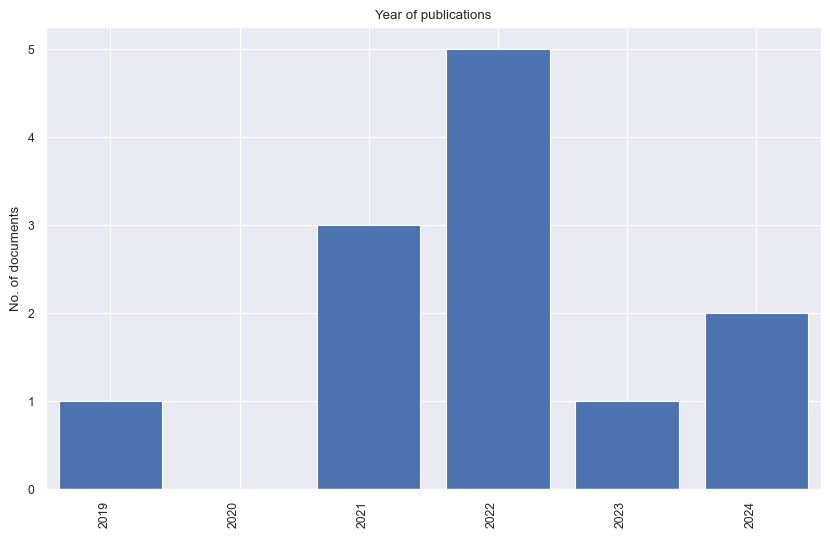

In [13]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
print(pdStatYear)

#plt.figure(1)
litstudy.plot_year_histogram(docs_filtered, vertical=True);
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_01_plot_year_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

C:\Users\vitto\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


   index  Frequency Journal Conference Workshop Book Symposium Forum
0   2019          1       0          1        0    0         1     0
1   2020          0       0          0        0    0         0     0
2   2021          3       1          2        0    0         1     0
3   2022          5       4          1        0    0         0     0
4   2023          1       0          1        0    0         1     0
5   2024          2       2          0        0    0         0     0


Journal: 7
Conference: 5
Workshop: 0
Book: 0
Total: 12


Symposium: 3
Forum: 0




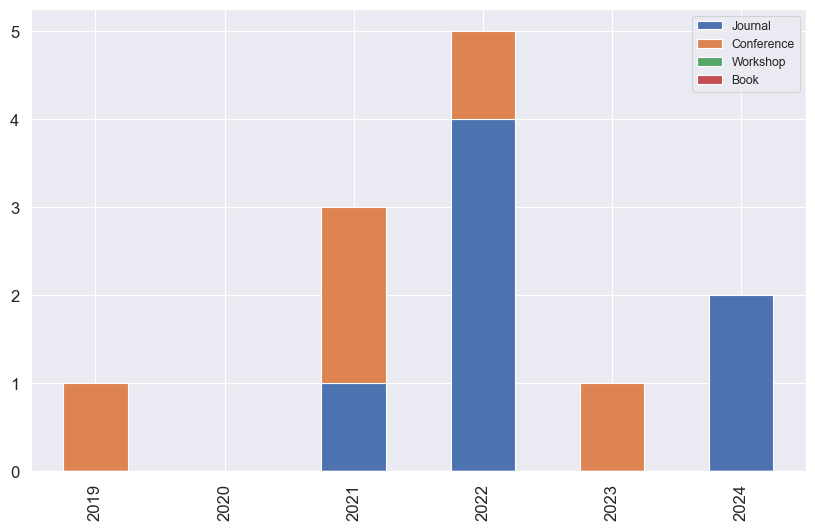

In [14]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
# print(pdStatYear)
pdStatYear["Journal"] = ""
pdStatYear["Conference"] = ""
pdStatYear["Workshop"] = ""
pdStatYear["Book"] = ""
pdStatYear["Symposium"] = ""
pdStatYear["Forum"] = ""
#for ind in pdStatYear.index:
#    print(pdStatYear[][ind], df['Frequency'][ind])
pdStatYear2 = pdStatYear.reset_index()
# print(pdStatYear2)
#df2 = pdStatYear2[pdStatYear2.columns[0]]
# print(pdStatYear2["index"][3])

# loop through the rows using iterrows()
for index, row in pdStatYear2.iterrows():
    # print(row['index'], row['Frequency'])
    
    docs_journal = docs_bib.filter_docs(lambda d: (d.source_type == 'Journal'  or d.id.doi == '10.1145/3696414') 
                                        and d.publication_year == row['index'])
    # print(len(docs_journal))
    pdStatYear2.loc[index,'Journal'] = len(docs_journal)
    
    pattern_conf = ['conference','symposium','lecture notes','congress','Design, Automation and Test in Europe']
    docs_conf = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                      d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                       re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE)  or
                                       re.search('studies',str(d.publication_source),re.IGNORECASE) or
                                        docs_filtered[index].id.doi == '10.1007/978-3-031-16088-2_4' or
                                        docs_filtered[index].id.doi == '10.1109/DEST.2010.5610662' or
                                       re.search('Event-Driven Interoperable Manufacturing Ecosystem for Energy Consumption Monitoring',str(docs_filtered[index].title),re.IGNORECASE) or
                                       re.search('forum',str(d.publication_source),re.IGNORECASE) ) and
                                       (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('companion',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('MODELS-C',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('ICSA-C',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Conference'] = len(docs_conf)
    
    doc_workshop = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' ) and 
                                            d.publication_year == row['index'] and 
                                            (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                            (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                             re.search('seminar',str(d.publication_source),re.IGNORECASE) or                                          
                                             re.search('2021 Design, Automation and Test in Europe Conference and Exhibition, DATE 2021',str(d.publication_source),re.IGNORECASE) or
                                             re.search('companion',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('MODELS-C',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('ICSA-C',str(d.publication_source),re.IGNORECASE) ) )
    
    # indexPP = 0
    # while indexPP < len(doc_workshop):
        # print(doc_workshop[indexPP].title)
        # print(doc_workshop[indexPP].source_type)
    #     indexPP += 1
    
    # print(len(doc_book_series))
    pdStatYear2.loc[index,'Workshop'] = len(doc_workshop)
    doc_book = docs_bib.filter_docs(lambda d: d.source_type == 'Book' and d.publication_year == row['index'])
    # print(len(doc_book))
    pdStatYear2.loc[index,'Book'] = len(doc_book)
    
    pattern_symp = ['symposium','']
    docs_symp = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569')
                                     and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                     (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                     (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Symposium'] = len(docs_symp)
                                     
    pattern_forum = ['forum','']
    docs_forum = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Forum'] = len(docs_forum)
    
#
print(pdStatYear2)
print('\n')
print('Journal:',pdStatYear2['Journal'].sum())
print('Conference:',pdStatYear2['Conference'].sum())
print('Workshop:',pdStatYear2['Workshop'].sum())
print('Book:',pdStatYear2['Book'].sum())
print('Total:',pdStatYear2['Journal'].sum()+pdStatYear2['Conference'].sum()+pdStatYear2['Workshop'].sum()+pdStatYear2['Book'].sum())
print('\n')
print('Symposium:',pdStatYear2['Symposium'].sum())
print('Forum:',pdStatYear2['Forum'].sum())
print('\n')

# plt.figure(2)
# fig, ax = plt.subplots()
pdStatYear2.plot.bar(x='index', y=['Journal','Conference','Workshop','Book'], xlabel='', stacked=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('')
plt.grid(True)

"""
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
"""

plt.savefig('Results/' + str(filename) + '_02_plot_year_type_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [15]:
import re

index = 0
while index < len(docs_filtered):
    for author in docs_filtered[index].authors or []:
        re.sub(r'[\(\[].*?[\)\]]', '', str(author.name))
    index += 1

pdStatAuthors = litstudy.stats.compute_author_histogram(docs_filtered)

pdStatAuthors

,Frequency
Bucaioni A. (AUID: 56236820700),2
Raitviir C.R. (AUID: 57219490628),1
Kiritsis D. (AUID: 6701692247),1
Rumpe B. (AUID: 55861872700),1
Van Der Aalst W. (AUID: 7007153024),1
Wehrle K. (AUID: 56253795600),1
Wortmann A. (AUID: 56581745100),1
Ziefle M. (AUID: 6602475572),1
Quix C. (AUID: 23398177400),1
Siriweera A. (AUID: 57222406198),1


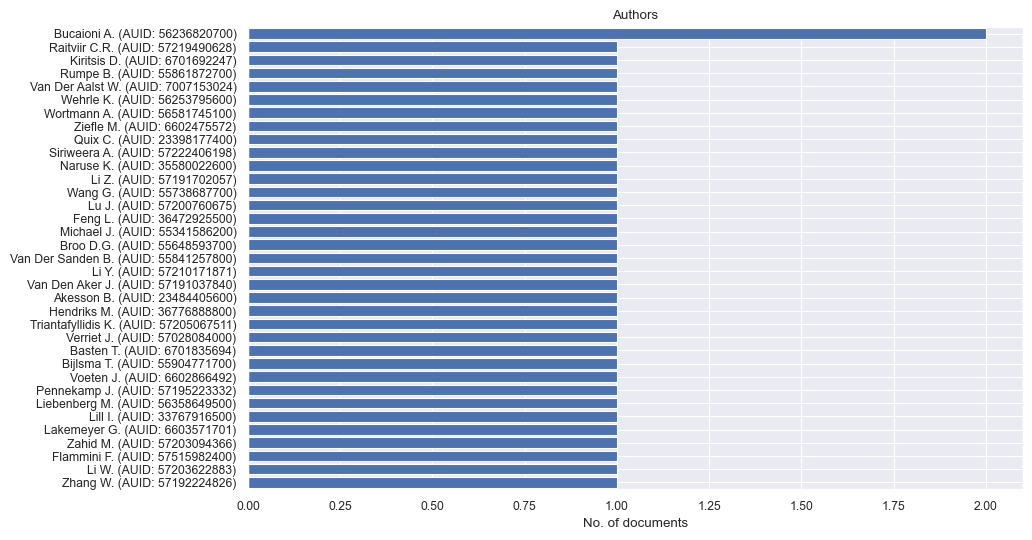

In [16]:
plt.figure(3)
litstudy.plot_author_histogram(docs_filtered, stacked=True, limit=35)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_03_plot_authors_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

,Frequency
ACM Computing Surveys,2
International Symposium on Computer Science and Intelligent Control ISCSIC,2
IEEE Access,2
Buildings,1
International Conference on Computing in Civil and Building Engineering ICCCBE,1
Journal of Information Technology in Construction,1
ACM Transactions on Internet of Things,1
IEEE International Symposium on Systems Engineering ISSE,1
ACM SIGBED International Conference on Embedded Software EMSOFT held as part of the Embedded Systems Week ESWEEK,1


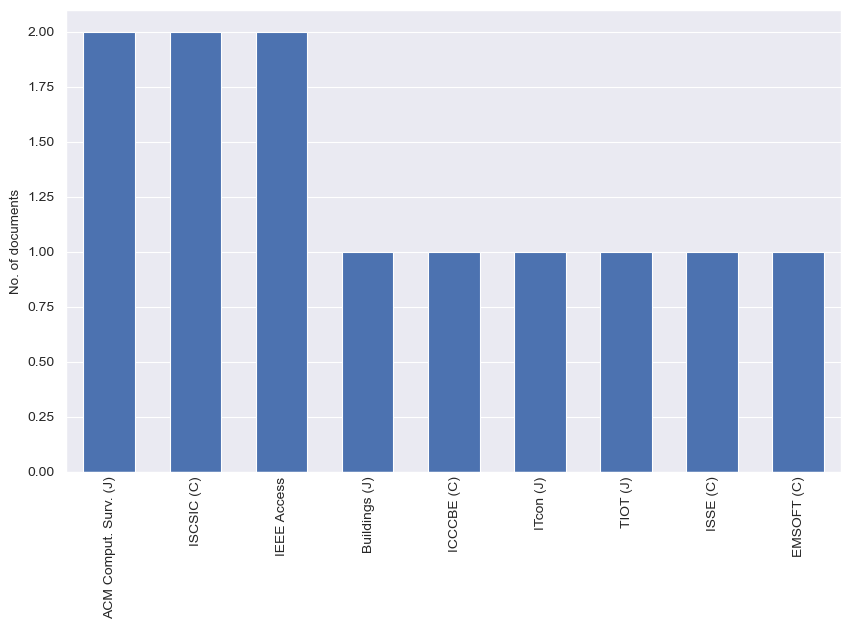

In [21]:
# This names are long, which is why a short abbreviation is provided.
mapping = {
    "2023 7th International Symposium on Computer Science and Intelligent Control, ISCSIC 2023": "ISCSIC (C)",
    "18th IEEE Conference on Industrial Electronics and Applications, ICIEA 2023": "ICIEA",
    "International Journal of Applied Earth Observation and Geoinformation": "Int. J. Appl. Earth Obs. Geoinf.",
    "2023 IEEE International Conference on Enabling Technologies: Infrastructure for Collaborative Enterprises, WETICE 2023": "WETICE (C)",
    "18th International Conference on Availability, Reliability and Security, ARES 2023": "ARES (C)",
    "19th International Conference on Computing in Civil and Building Engineering, ICCCBE 2022": "ICCCBE (C)",
    "23rd IFIP WG 5.5 Working Conference on Virtual Enterprises, PRO-VE 2022": "PRO-VE 2022",
    "Journal of Information Technology in Construction": "ITcon (J)",
    "25th International Academic Mindtrek Conference, Academic Mindtrek 2022": "Academic Mindtrek (C)",
    "2022 Australasian Computer Science Week, ACSW 2022": "ACSW (C)",
    "19th International Conference on Content-based Multimedia Indexing, CBMI 2022": "CBMI (C)",
    "ACM Transactions on Internet of Things": "TIOT (J)",
    "7th IEEE International Symposium on Systems Engineering, ISSE 2021": "ISSE (C)",
    "21st ACM SIGBED International Conference on Embedded Software, EMSOFT 2021, held as part of the Embedded Systems Week, ESWEEK 2021": "ESWEEK (C)",
    "2020 IEEE International Conference on Industrial Engineering and Engineering Management, IEEM 2020": "IEEM (C)",
    "Total Quality Management and Business Excellence": "Total Qual. Manag. Bus. Excell.",
    "2020 IEEE International Conference on Industrial Engineering and Engineering Management, IEEM 2020": "IEEM (C)",
    "3rd International Conference on Information Science and System, ICISS 2020": "ICISS (C)",
    "3rd International Symposium on Computer Science and Intelligent Control, ISCSIC 2019": "ISCSIC (C)",
    "ASME 2019 38th International Conference on Ocean, Offshore and Arctic Engineering, OMAE 2019": "OMAE (C)",
    "5th IEEE/ACM International Workshop on Software Engineering for Smart Cyber-Physical Systems, SEsCPS 2019": "SEsCPS (W)",
    "ACM Computing Surveys (J)": "ACM Comput. Surv. (J)",
    "International Symposium on Computer Science and Intelligent Control ISCSIC": "ISCSIC (C)",
    "International Conference on Computing in Civil and Building Engineering ICCCBE": "ICCCBE (C)",
    "Journal of Information Technology in Construction": "ITcon (J)",
    "ACM Transactions on Internet of Things": "TIOT (J)",
    "IEEE International Symposium on Systems Engineering ISSE": "ISSE (C)",
    "ACM SIGBED International Conference on Embedded Software EMSOFT held as part of the Embedded Systems Week ESWEEK": "EMSOFT (C)",
    "Buildings": "Buildings (J)"
}

# This names are long, which is why a short abbreviation is provided.
import matplotlib.transforms

# plt.figure(4)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_filtered, vertical=True, label_rotation=0, bar_width=0.6, mapper=mapping, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_04_plot_source_all_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

import csv

pdStatVenue = litstudy.stats.compute_source_histogram(docs_filtered)
display(pdStatVenue)
pdStatVenue.to_csv('Results/' + str(filename) + '_04_Venues_all.csv')   

In [22]:
docs_journal_all = docs_bib.filter_docs(lambda d: d.source_type == 'Journal'  or d.id.doi == '10.1145/3696414')
# print(len(docs_journal))

pattern_conf = ['conference','symposium','lecture notes','congress','Design, Automation and Test in Europe']
docs_conf_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                   re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE) or
                                   re.search('studies',str(d.publication_source),re.IGNORECASE) ) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('companion',str(d.publication_source),re.IGNORECASE)) )

doc_workshop_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                  d.id.doi == '10.24251/HICSS.2017.569') and  
                                        (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                        (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                         re.search('companion',str(d.publication_source),re.IGNORECASE) or
                                         re.search('forum',str(d.publication_source),re.IGNORECASE) ) )

doc_book_all = docs_bib.filter_docs(lambda d: d.source_type == 'Book')

pattern_symp = ['symposium','']
docs_symp_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )

pattern_forum = ['forum','']
docs_forum_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )

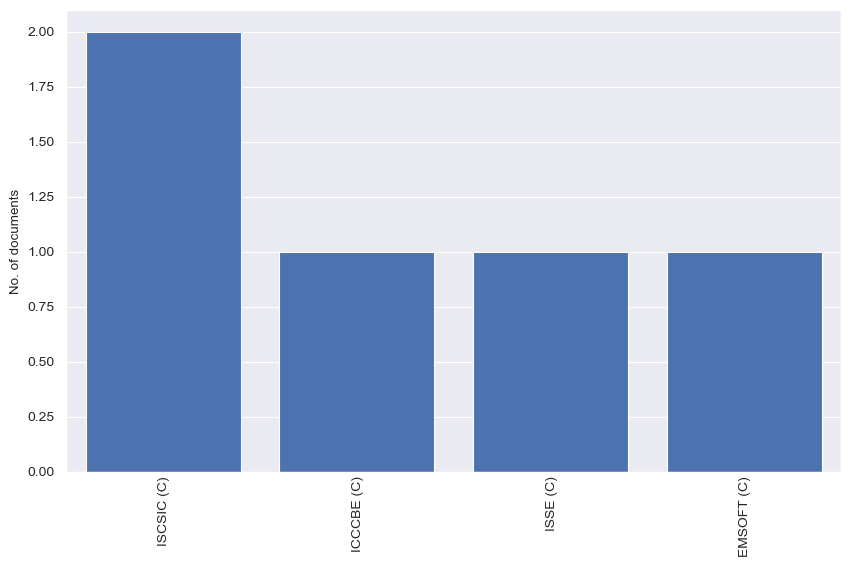

In [23]:
# plt.figure(5)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_conf_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_05_plot_source_conf_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

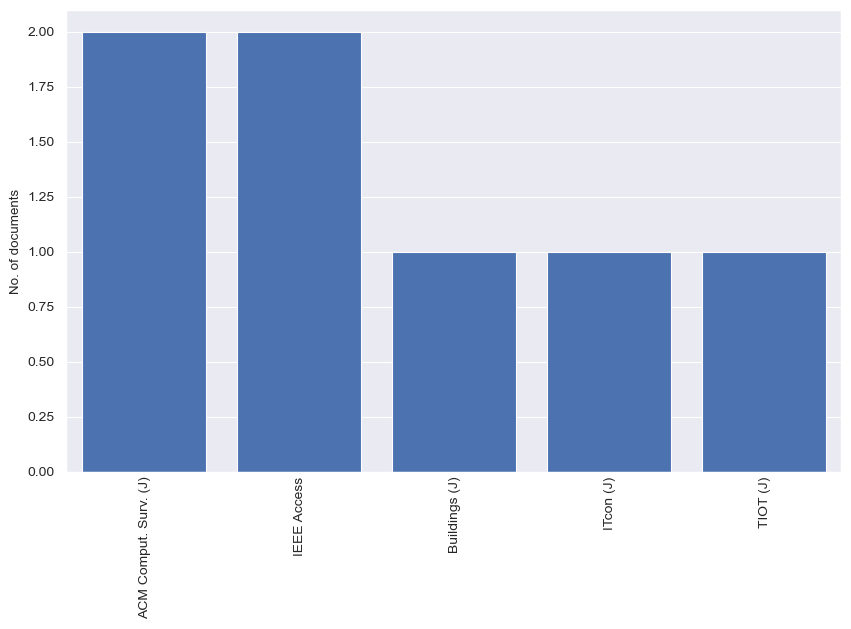

In [24]:
# plt.figure(6)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_journal_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_06_plot_source_journal_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

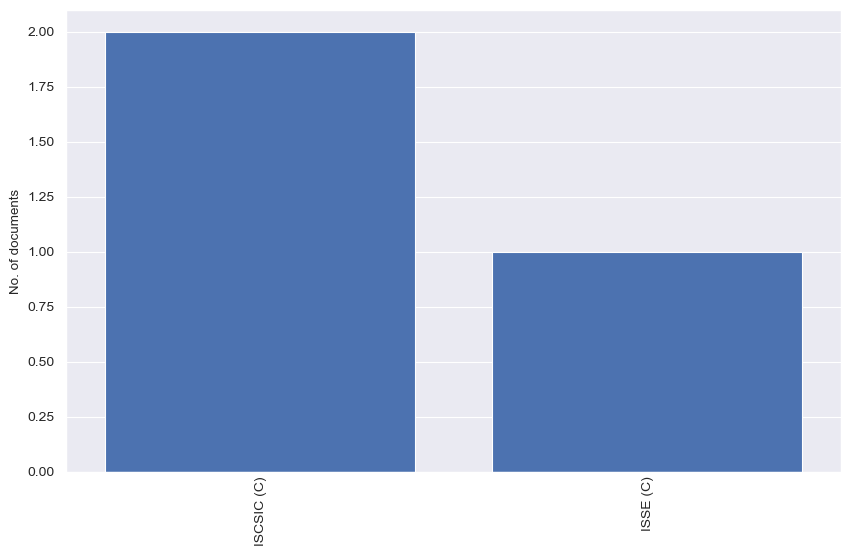

In [25]:
# plt.figure(8)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_symp_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_08_plot_source_symposium_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

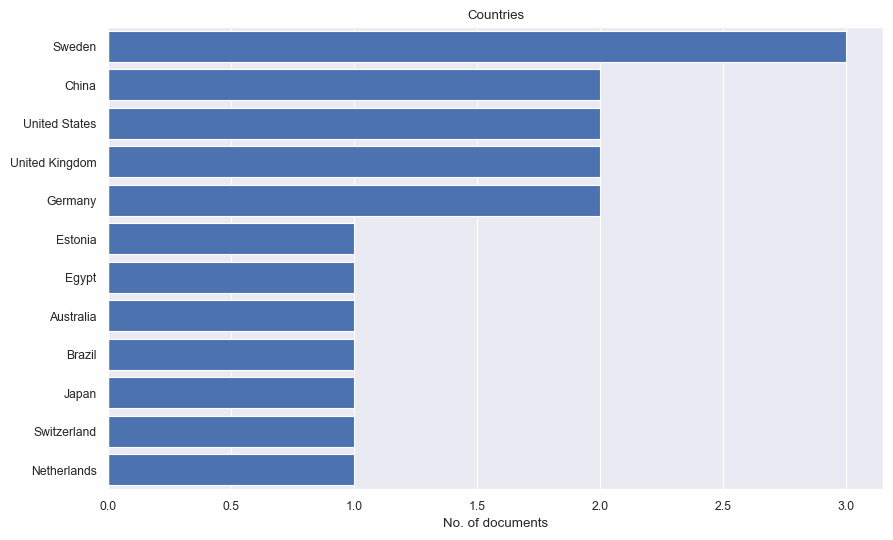

In [26]:
litstudy.plot_country_histogram(docs_filtered, limit=15);

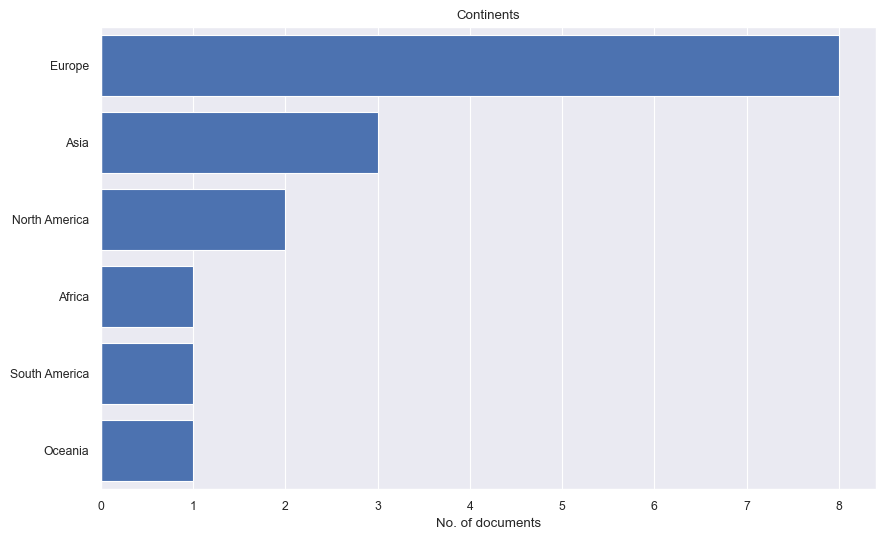

In [27]:
litstudy.plot_continent_histogram(docs_filtered);

# Selected Paper Network Analysis
Litstudy Network analysis

In [28]:
################################ CITATION NETWORK ###############################################
litstudy.plot_network(litstudy.build_citation_network(docs_filtered), smooth_edges=None, max_node_size=25, min_node_size=5, file_name='Results/' + str(filename) + '_09_network_full.html')

Results/SOTA_SECO_CPS_2024-11-27_16-9-26_09_network_full.html


In [29]:
import networkx as nx

bb_full = litstudy.build_citation_network(docs_filtered)

In [30]:
index = 0
data = []

while index < len(bb_full.nodes):
    References = 0
    RefID = ''
    CitedBy = 0
    CitedID = ''
    
    print('Paper', index)
    print('Title:', bb_full.nodes[index].get('title'))
    print('Degree:', bb_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_full.out_edges(index))):
        edgeOut = list(bb_full.out_edges(index))[idx]
        print('Reference Paper:', edgeOut[1])
        RefID = RefID + '<' + str(edgeOut[1]) + '>'
        print('Title:', bb_full.nodes[edgeOut[1]].get('title'))
        
        References += 1
    
    print('References:', References)
    print('\n')
    
    for idx in range(len(bb_full.in_edges(index))):
        edgeIn = list(bb_full.in_edges(index))[idx]
        print('Cited by Paper:', edgeIn[0])
        CitedID = CitedID + '<' + str(edgeIn[0]) + '>'
        print(CitedID)
        print('Title:', bb_full.nodes[edgeIn[0]].get('title'))
        CitedBy += 1
    
    print('Citations:', CitedBy)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_full.nodes[index].get('title'), 'Degree': bb_full.degree[index], 'ReferencesID': RefID, 'TotRef': References, 'CitedByID': CitedID, 'TotCit': CitedBy})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper', 'Title', 'Degree', 'ReferencesID', 'TotRef', 'CitedByID', 'TotCit'])

df.to_excel('Results/' + str(filename) + '_10_CitationGraphFull.xlsx', index=False)

Paper 0
Title: Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle
Degree: 0


References: 0


Citations: 0


Paper 1
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Degree: 1


Reference Paper: 3
Title: Architecting Digital Twins
References: 1


Citations: 0


Paper 2
Title: Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
Degree: 0


References: 0


Citations: 0


Paper 3
Title: Architecting Digital Twins
Degree: 2


Reference Paper: 11
Title: Cloud-Based Battery Digital Twin Middleware Using Model-Based Development
References: 1


Cited by Paper: 1
<1>
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Citations: 1


Paper 4
Title: How Can Digital Twins Support the Net Zero Vision?
Degree: 0


References: 0


Citations: 0


Paper 5
Title: A REV

In [31]:
######################################### COUPLING NETWORK ########################################
litstudy.plot_coupling_network(docs_filtered, max_edges=150, node_size=10, file_name='Results/' + str(filename) + '_11_co-network_full.html')

Results/SOTA_SECO_CPS_2024-11-27_16-9-26_11_co-network_full.html


In [32]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

In [33]:
coup = 0
coupID = ''
coupWeight = ''
    
index = 0
for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        print('coupID:',coupID)
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('coupWeight:',coupWeight)
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        coup += 1

In [34]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

# bb_coup_full.edges
#bb_coup_full.edges(1)
# bb_coup_full.get_edge_data(70,106)

index = 0
data = []
while index < len(bb_coup_full.nodes):
    print(bb_coup_full.edges(index))
    
    coup = 0
    coupID = ''
    coupWeight = ''
    
    print('Paper', index)
    print('Title:', bb_coup_full.nodes[index].get('title'))
    print('Degree:', bb_coup_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        coup += 1
        
    print('Total Coupling Papers:', coup)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_coup_full.nodes[index].get('title'), 'Degree': bb_coup_full.degree[index], 'Coupling Paper': coupID, 'Total Coupling Papers': coup, 'Weight': coupWeight})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper','Title', 'Degree', 'Coupling Paper', 'Total Coupling Papers','Weight'])

df.to_excel('Results/' + str(filename) + '_12_Co-CitationGraphFull.xlsx', index=False)

[]
Paper 0
Title: Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle
Degree: 0


Total Coupling Papers: 0


[(1, 3)]
Paper 1
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Degree: 1


Coupling Paper: 3
Title: Architecting Digital Twins
Total Coupling Papers: 1


[(2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 10)]
Paper 2
Title: Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
Degree: 6


Coupling Paper: 3
Title: Architecting Digital Twins
Coupling Paper: 4
Title: How Can Digital Twins Support the Net Zero Vision?
Coupling Paper: 5
Title: A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION
Coupling Paper: 6
Title: Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities
Coupling Paper: 8
Title: Survey on Cloud Robotics Architecture and Model-Driven Reference Architecture for Decen

In [35]:
################################## TOPIC MODELING ###################################
corpus = litstudy.build_corpus(docs_filtered, remove_words=['state','art','international',
          'publishing','nature','switzerland','association','computing','rights','reserved',
        'owner','author','recent','years','enable','allows','introduce','existing','identify','efficient',
        'literature','respect','update','view','achieved','assessment'], max_tokens=10000, ngram_threshold=0.0001) # custom_bigrams=custom_big

In [36]:
index = 0
while index < len(corpus.dictionary): 
    first_key = list(corpus.dictionary.values())[index]
    print(first_key)
    index += 1 

importance
information
integration
potential
processes
research
sectors
technology
complex
manufacturing
physical
production
support
systematic
collected
driven
challenges
general
identified
design


In [37]:
len(corpus.frequencies)

12

In [39]:
indexFREQ = 0
while indexFREQ < len(corpus.frequencies): 
    # print('Paper:',indexFREQ)
    #print('Title:',docs_filtered[indexFREQ].title)
    word_key = list(corpus.frequencies)[indexFREQ]
    index = 0
    data = []
    while index < len(word_key): 
        word = list(corpus.dictionary.values())[(word_key[index][0])]
        #print('Word:',word,' Freq:',word_key[index][1])
        data.append({'Word': word,'Freq': word_key[index][1]})
        index += 1
    
    # Saving first group of data to a single excel file
    df = pd.DataFrame(data, columns=['Word', 'Freq'])

    # Saving first group of data to a single csv file
    df.to_csv('Results/docs/' + str(indexFREQ) + '_word_freq.csv')

    # Saving first group of data to a single excel file
    #df.to_excel('Results/' + filename_xlsx, index=False)
    
    indexFREQ += 1

In [40]:
df_corpus = litstudy.compute_word_distribution(corpus, limit=500).filter(like='_', axis=0).sort_index()
df_corpus
df_corpus.to_csv('Results/' + str(filename) + '_13_abstract_word_freq.csv')

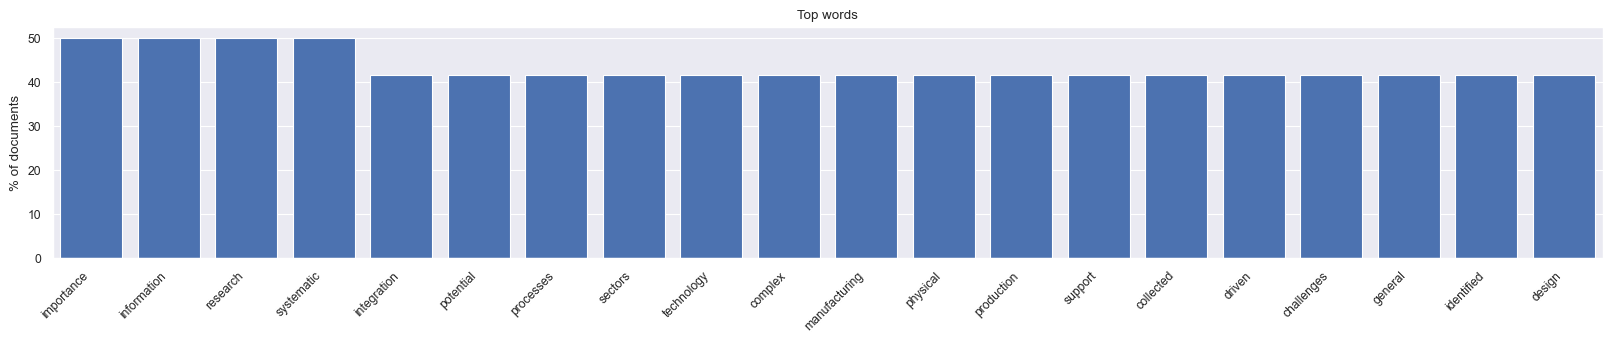

In [41]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, title="Top words", limit=100, vertical=True, label_rotation=45) # limit=25,
plt.savefig('Results/' + str(filename) + '_14_plot_word_distribution_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [43]:
###################### ##################
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=500)

In [44]:
import os
if os.path.exists('Results/' + str(filename) + '_15_Topics.txt'):
    os.remove('Results/' + str(filename) + '_15_Topics.txt')

for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i), file=open('Results/' + str(filename) + '_15_Topics.txt', 'a')) # a

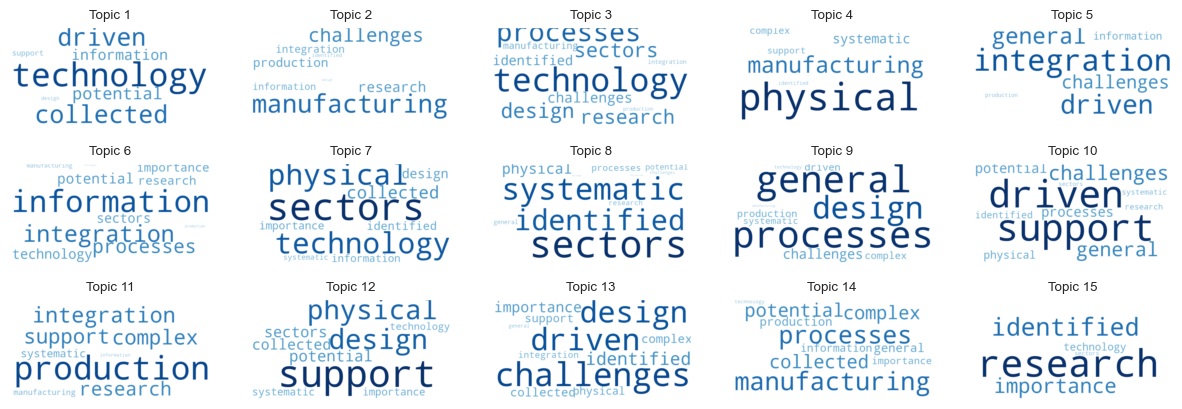

In [45]:
# Plot Topic Clouds
plt.figure(figsize=(15, 5))  # (25 topics: 25, 15), (15 Topics: 15, 5)
# litstudy.plot_topic_clouds(topic_model, ncols=5) 
litstudy.plot_topic_clouds(topic_model, ncols=5) 
plt.savefig('Results/' + str(filename) + '_16_plot_topic_clouds.png', dpi=300, bbox_inches='tight', format="PNG")

In [46]:
for doc_id in topic_model.best_topic_for_documents():
    index = int(doc_id)
    print(f'Topic n. {index} for: "', docs_filtered[index].title, '"')

Topic n. 5 for: " A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION "
Topic n. 3 for: " Architecting Digital Twins "
Topic n. 0 for: " Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle "
Topic n. 9 for: " A Bibliometric Analysis on Model-based Systems Engineering "
Topic n. 11 for: " Cloud-Based Battery Digital Twin Middleware Using Model-Based Development "
Topic n. 6 for: " Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities "
Topic n. 2 for: " Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation "
Topic n. 10 for: " Model-driven system-performance engineering for cyber-physical systems "
Topic n. 8 for: " Survey on Cloud Robotics Architecture and Model-Driven Reference Architecture for Decentralized Multicloud Heterogeneous-Robotics Platform "


IndexError: list index out of range

In [47]:
for i in range(num_topics):
    topic_id = int(i)
    print(f'Topic n. {topic_id} for: "', topic_model.best_tokens_for_topic(topic_id), '"\n')
    for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
        print(docs_filtered[int(doc_id)].title)
    print('\n')

Topic n. 0 for: " ['technology', 'collected', 'driven', 'potential', 'information'] "

Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
How Can Digital Twins Support the Net Zero Vision?
Cloud-Based Battery Digital Twin Middleware Using Model-Based Development
Model-driven system-performance engineering for cyber-physical systems
A Bibliometric Analysis on Model-based Systems Engineering
Survey on Cloud Robotics Architecture and Model-Driven Reference Architecture for Decentralized Multicloud Heterogeneous-Robotics Platform
A Computer Science Perspective on Digital Transformation in Production
Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities
A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION
Architecting Digital Twins


Topic n. 1 for: " ['manufacturing', 'challenges', 'research', 'production', 'integration'] "

Service Computing for Industry 4.0: State of the Art, Challenges, and 